In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from utils import sampleSplicing as sp
%matplotlib inline

In [2]:
#path to file
filePath = '/Users/benthompson/Google Drive/MIDS/210/w210-Capstone-AstroDrum/Kick Drums/'
file = 'VEE Bassdrum 000.wav'

In [3]:
#read in file
wav = wavfile.read(filePath+file)

/Users/benthompson/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [4]:
#shape of array
#13816 = # of samples (13816/44100 = .31 seconds long)
#2 = stereo instead of mono
wav[1].shape

(13816, 2)

In [5]:
# look at first few samples to find zero crossing (where sign changes from + t0 - or visa verssa)
# most audio will have 44100 samples/second
wav[1][:24]

array([[ -88,  -44],
       [ -28,  -30],
       [ -41,  -87],
       [ -64,  -44],
       [-107,  -42],
       [-153,  -33],
       [-131, -102],
       [ -56, -109],
       [ -32,  -72],
       [ -50, -110],
       [ -13,  -82],
       [ -60,  -76],
       [ -99,  -27],
       [ -41,  -38],
       [ -77,  -30],
       [ -42,  -26],
       [ -89,  -67],
       [-131, -119],
       [ -16, -101],
       [-133,   16],
       [-144,    8],
       [-139,  -18],
       [ -65,  -10],
       [  56,  -37]], dtype=int16)

In [6]:
#test zero crossing function
zeros = sp.findZeroCrossings(wav,stereo=True)
zeros

array([   22,    23,    29,    31,    55,    98,   164,   274,   275,
         278,   285,   287,   435,   437,   439,   588,   745,   913,
        1090,  1093,  1095,  1284,  1286,  1288,  1494,  1720,  1955,
        2197,  2447,  2708,  2986,  3275,  3576,  3894,  4223,  4571,
        4927,  5307,  5693,  6104,  6520,  6969,  7402,  7851,  8331,
        9024,  9631, 10151, 10998, 10999, 11002, 11783, 11784, 11786,
       12402, 12403, 12406, 12407, 12415, 13388, 13389, 13390, 13392,
       13393, 13395, 13397, 13398, 13400, 13402, 13403, 13404, 13405,
       13412, 13414, 13417, 13418])

In [19]:
#test split function
split1,split2 = sp.splice(wav,35,stereo=True)

In [20]:
split1.shape

(1495, 2)

In [21]:
split2.shape

(12321, 2)

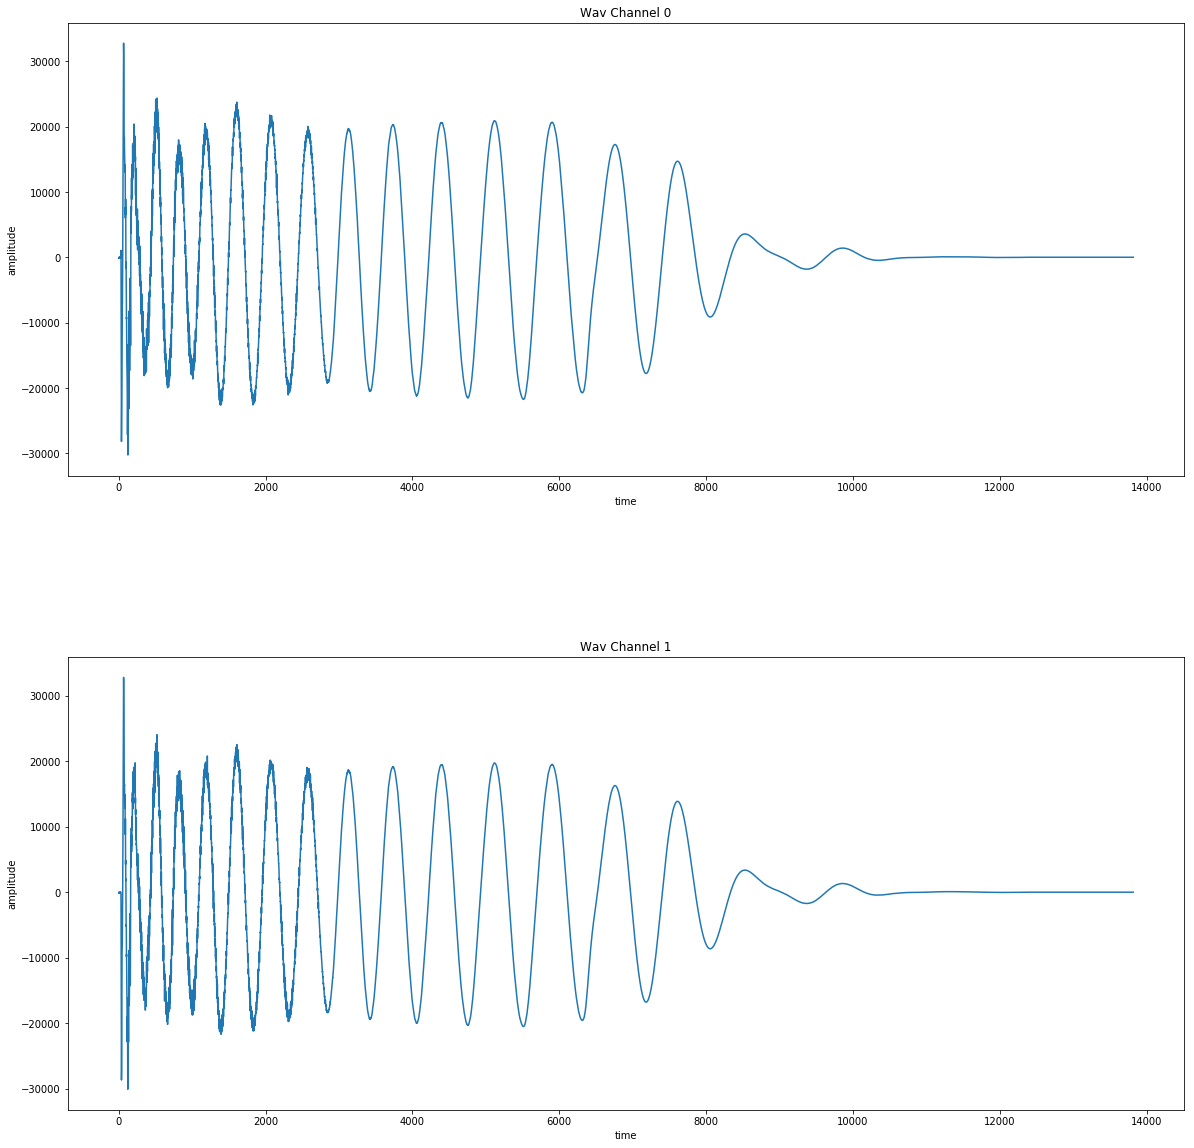

In [22]:
#look at original wav file
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(wav[1][:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('Wav Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)

In [23]:
#play file
#have to rerun cell each time want to play
#correct sound. If keep hitting play wo
#rerunning cell it doesn't play full sample
ipd.Audio(filePath+file)

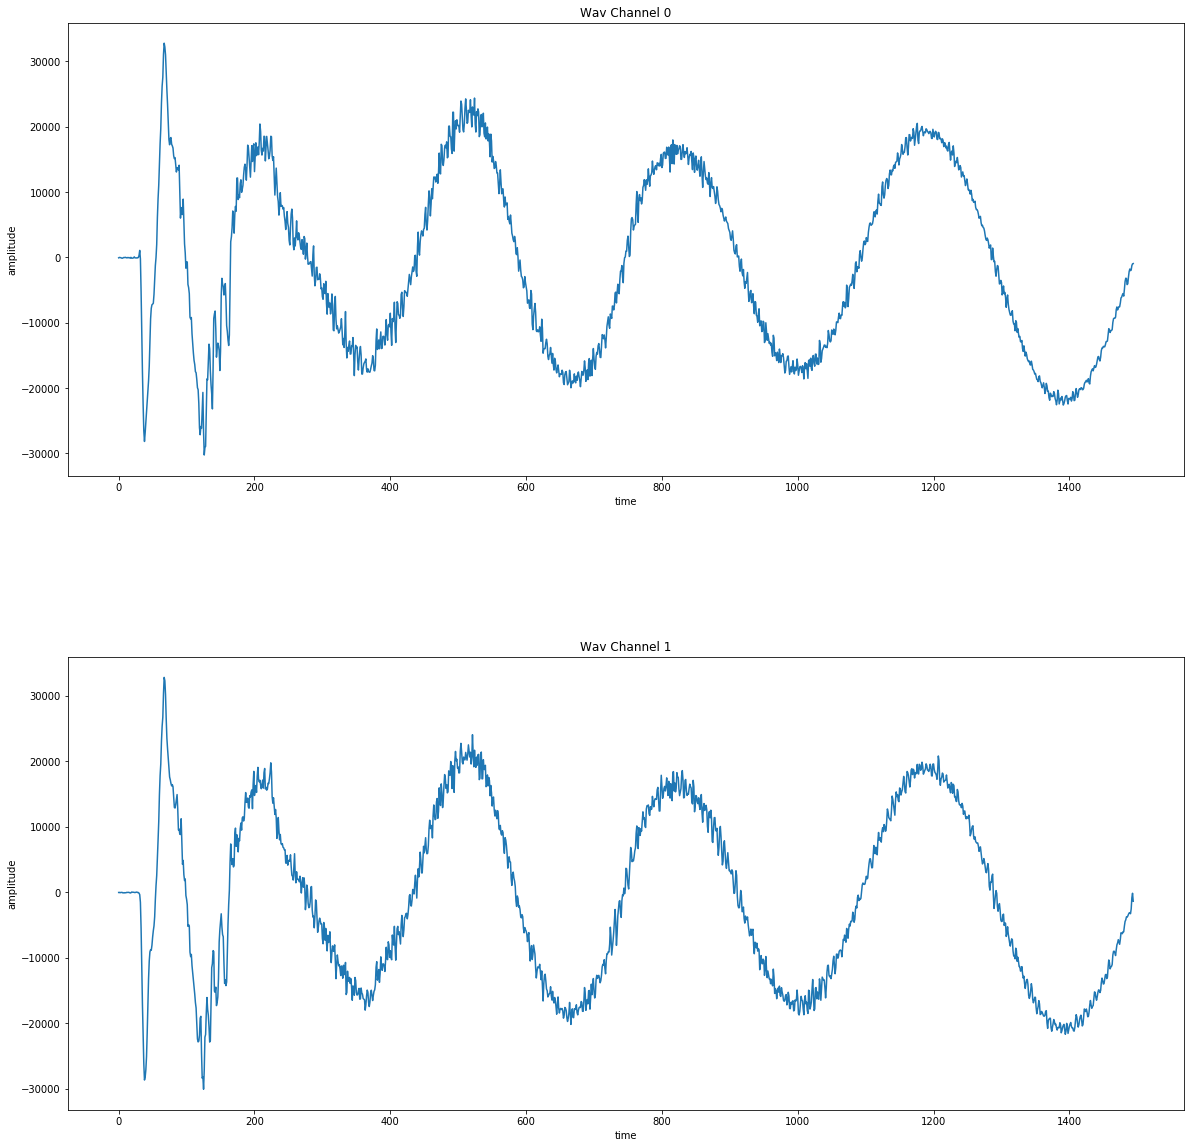

In [32]:
#look at split1 wav file
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(split1[:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('Wav Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)

In [34]:
#play it - FOR NOW JUST DOING ONE CHANNEL NOT SURE HOW TO DO BOTH
ipd.Audio(split1[:,0], rate=44100)

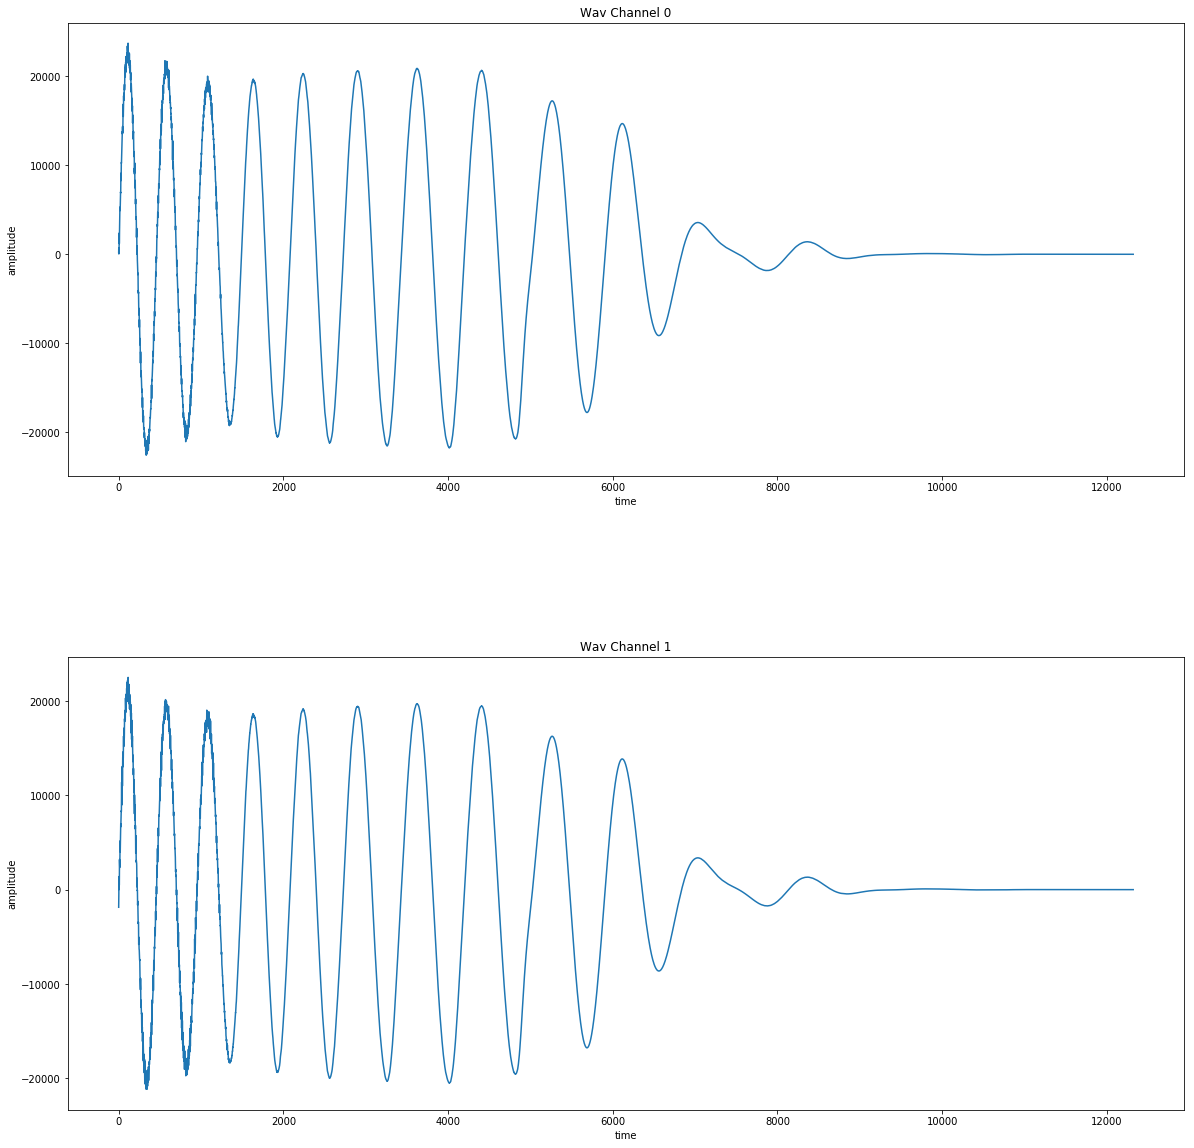

In [27]:
#look at split2 wav file
plt.figure(figsize=(20,20))
for i in [0,1]:
    plt.subplot(2, 1, i+1)
    plt.plot(split2[:,i])
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title('Wav Channel ' + str(i))
    plt.subplots_adjust(wspace=.4, hspace=.4)

In [31]:
#play it - FOR NOW JUST DOING ONE CHANNEL NOT SURE HOW TO DO BOTH
ipd.Audio(split2[:,0], rate=44100)